# Occurrence frequencies of IVT object for regional control ICON experiment forced by CNMR (1984-2014)

In [24]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import load_pkl, create_datetime_lists, get_datetime_str, count_objs_grid_points 
from src.Enumerations import *
from src.Enumerations import GPH700_5Cluster_JJA
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [2]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.IVTobj_out_path
input_path_ERA5= exp_ERA5.IVTobj_out_path


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1998
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [3]:
IVT_objs_ICON_ERA5 = load_tracking_objects(input_path_ICON_ERA5,
                                      input_file_name_temp_ICON_ERA5,
                                      type_, first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ICON_ERA5,
                                      save_pkl=True,
                                      load_clusters=True,
                                      suffix = "_all_clusters"
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_DRIVENBY_ERA5_remapped_3x/Object_container_1998-2022_all_clusters_withClusters exists. Loading...


In [4]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ERA5,
                                      save_pkl=True,
                                      load_clusters=True,
                                      suffix = "_all_clusters"


                                      )

 
    
 

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1998-2022_all_clusters_withClusters exists. Loading...


In [18]:
IVT_objs_ERA5[299]

<xarray.Dataset> Size: 2kB
Dimensions:          (times: 14)
Coordinates:
  * times            (times) datetime64[ns] 112B 1998-06-30T04:00:00 ... 1998...
Data variables: (12/13)
    id_              <U6 24B '190300'
    exp              object 8B <class 'src.Experiments_infos.ERA5'>
    size             (times) float64 112B 3.799e+03 7.594e+03 ... 940.5
    total_IVT        (times) float32 56B 1.029e+03 2.069e+03 ... 1.238e+03 240.3
    mean_IVT         (times) float32 56B 257.2 258.6 260.4 ... 253.4 247.7 240.3
    max_IVT          (times) float32 56B 258.2 268.7 269.8 ... 259.5 251.2 240.3
    ...               ...
    mass_center_idy  (times) float64 112B 2.0 2.125 2.25 1.9 ... 3.5 3.8 3.8 5.0
    mass_center_idx  (times) float64 112B 1.5 2.0 2.25 2.0 ... 3.333 3.4 3.4 3.0
    track            (times) object 112B RotatedGridPoint(lat=31.299999237060...
    speed            (times) float64 112B nan 16.79 9.105 ... 10.01 0.0 41.2
    gridpoints       (times) object 112B [RotatedGridPoint(lat=31.0, lon=-18....
    clusters         (times) <U11 616B 'SUMMER-NAO-' ... 'SUMMER-NAO-'

SUMMER-NAO+
SUMMER-NAO-
SUMMER-ATL-
SUMMER-SCAN
SUMMER-DIP


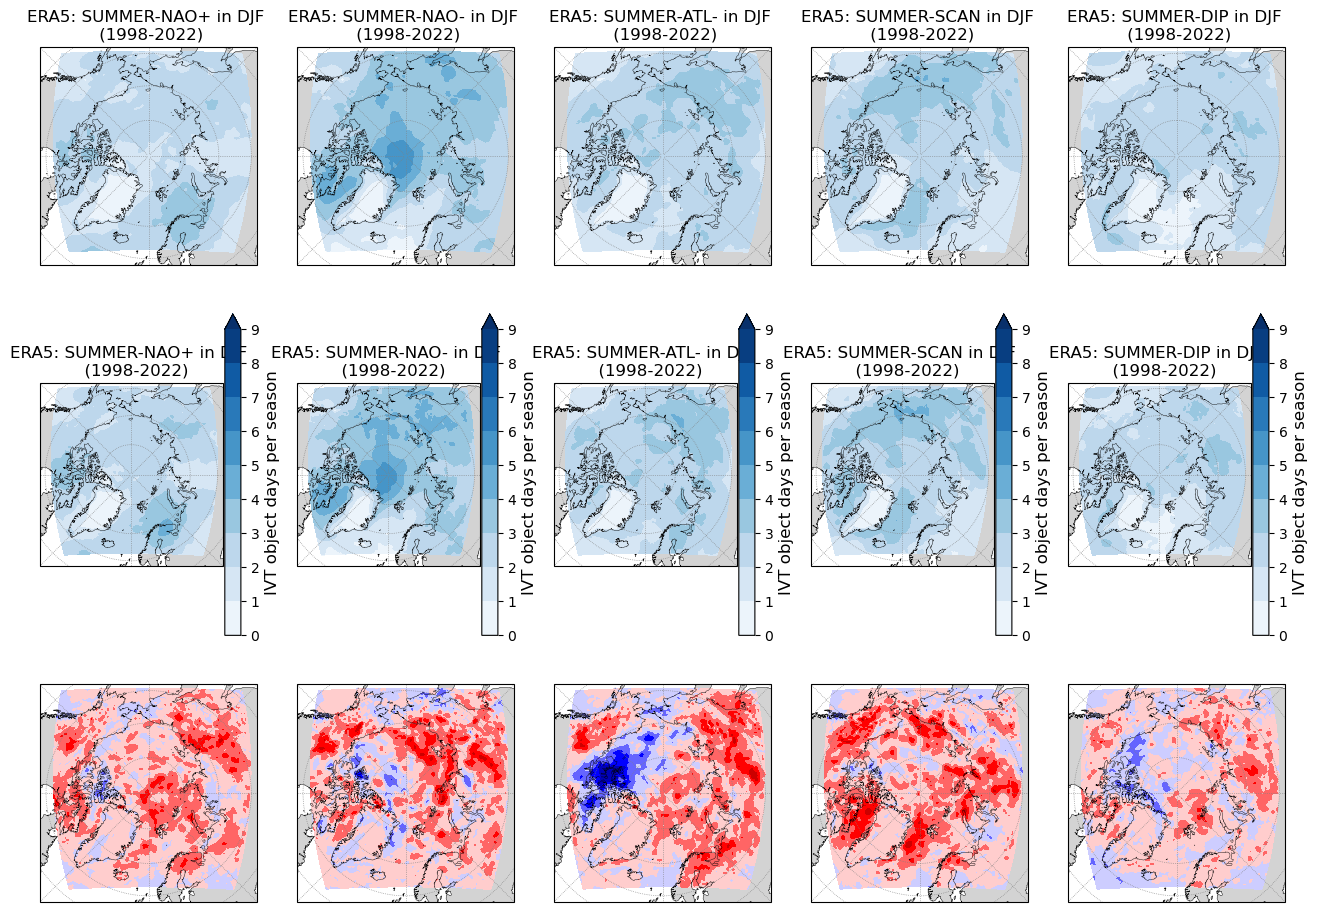

In [27]:
fig = plt.figure(figsize=(13,10))
subplts = (3,5)
levels=np.arange(0,10,1)
for   i, regime in enumerate(GPH700_5Cluster_JJA):
    
    regime= regime.value
    print (regime)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(Season.JJA).sel_by_regime(regime)

    lon,lat,z_ERA5 = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ERA5= (z_ERA5/num_years)*1.000001
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ERA5, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5: {regime}  \n ({first_year}-{last_year})",
                                  cbar_label = "IVT object days per season",
                                  cbar=False)
    
    

    IVTobjs_sel_ICON_ERA5 = IVT_objs_ICON_ERA5.sel_season(Season.JJA).sel_by_regime(regime)

    lon,lat,z_ICON_ERA5 = count_objs_grid_points(IVTobjs_sel_ICON_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ICON_ERA5= (z_ICON_ERA5/num_years)*1.000001


    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ICON_ERA5, 
                                  fig=fig,
                                  index = i+5,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5: {regime}  \n  ({first_year}-{last_year})",
                                  cbar_label = "IVT object days per season",)
    
    plot_on_rotated_grid(lon,
                                  lat, 
                                  z_ICON_ERA5-z_ERA5, 
                                  fig=fig,
                                  index = i+10,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-1,1.1,0.2),
                                  #title=f"ERA5 minus ICON-ERA5: {regime} in DJF ({first_year}-{last_year})",
                                  cbar_label = "IVT object day difference per season",
                                  cbar=False)
plt.tight_layout()    

Season.DJF
Season.MAM
Season.JJA
Season.SON


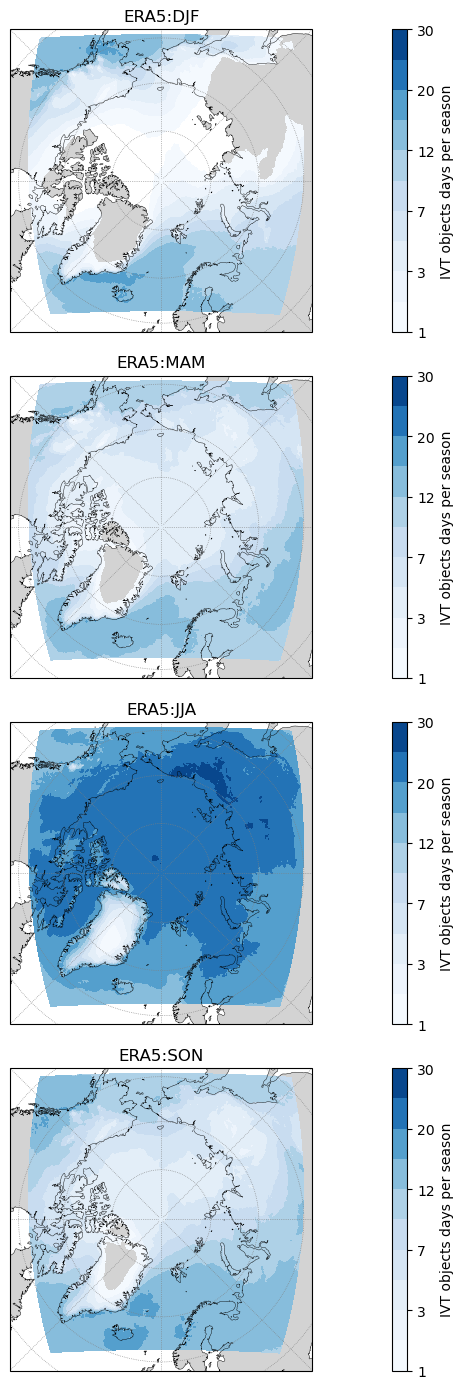

In [30]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
    IVTobjs_sel = IVT_objs_ICON_ERA5.sel_season(season_)

    lon,lat,z = count_objs_grid_points(IVTobjs_sel)
    
    # normalize grid point counts to counts per season
    z= z/num_years
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  title=f"ERA5:{season_.name}",
                                  cbar_label = "IVT objects days per season")
    
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


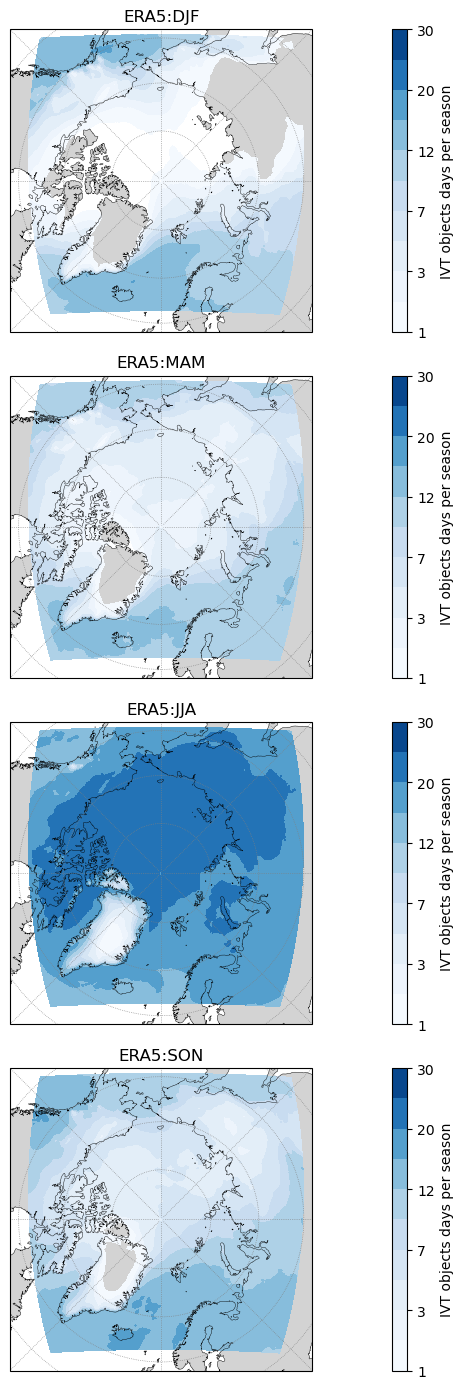

In [ ]:
fig = plt.figure(figsize=(80,14))

for i, season_ in enumerate(Season):
    print (season_)
    IVTobjs_sel = IVT_objs_ERA5.sel_season(season_)

    lon,lat,z = count_objs_grid_points(IVTobjs_sel)
    
    # normalize grid point counts to counts per season
    z= z/num_years
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i,
                                  title=f"ERA5:{season_.name}",
                                  cbar_label = "IVT objects days per season")
    
plt.tight_layout()

In [ ]:
exp_CNRM=Experiments.ICON_CNRM_CONTROL.value
exp_ERA5=Experiments.ERA5.value

input_path_ERA5= exp_ERA5.path_IVT_tracking
input_path_CNRM= exp_CNRM.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_CNRM = 'MOAPP_ICON_100and85controlperc_remapped_3x'

first_year = 1984
last_year = 2014
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [3]:
IVT_objs_CNRM = load_tracking_objects(input_path_CNRM,
                                      input_file_name_temp_CNRM,
                                      type_, first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_CNRM,
                                      save_pkl=False,
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/CNRM_control_remapped_3x/Object_container_1984-2014 exists. Loading...


In [4]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ERA5,
                                      save_pkl=False,
                                      )

 
    
  

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1984-2014 exists. Loading...


NAO+
NAO-
ATL-
SCAN


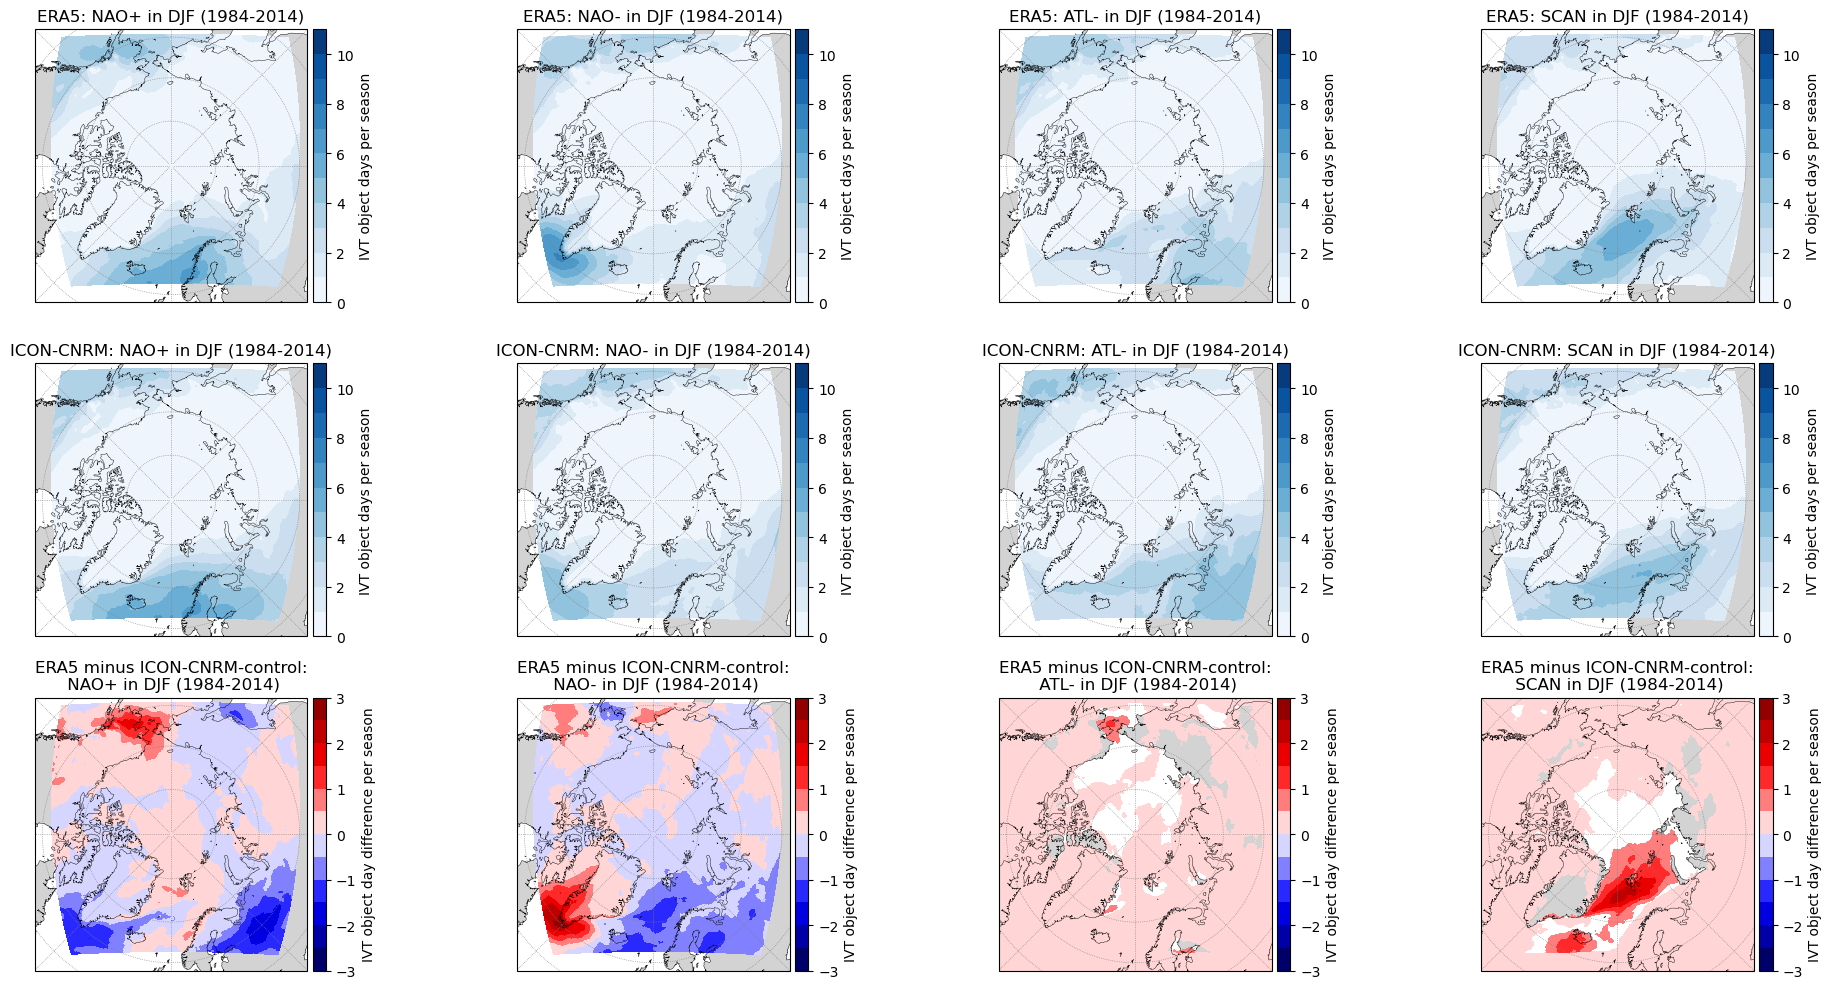

In [9]:
fig = plt.figure(figsize=(20,10))
subplts = (3,4)
levels=np.arange(0,12,1)
for   i, regime in enumerate(GPH700_4Cluster):
    
    regime= regime.value
    print (regime)
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(Season.DJF).sel_by_regime(regime)

    lon,lat,z_ERA5 = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_ERA5= (z_ERA5/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_ERA5, 
                                  fig=fig,
                                  index = i,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ERA5: {regime} in DJF ({first_year}-{last_year})",
                                  cbar_label = "IVT object days per season",)
    

    IVTobjs_sel_CNRM = IVT_objs_CNRM.sel_season(Season.DJF).sel_by_regime(regime)

    lon,lat,z_CNRM = count_objs_grid_points(IVTobjs_sel_CNRM, normalization_factor=24.)
    
    # normalize grid point counts to counts per season
    z_CNRM = (z_CNRM/num_years)*1.000001

    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_CNRM, 
                                  fig=fig,
                                  index = i+4,
                                  subplts=subplts,
 
                                  levels = levels,
                                  title=f"ICON-CNRM: {regime} in DJF ({first_year}-{last_year})",
                                  cbar_label = "IVT object days per season",)
    
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z_ERA5-z_CNRM, 
                                  fig=fig,
                                  index = i+8,
                                  subplts=subplts,
                                   cmap="seismic",
 
                                  levels = np.arange(-3,3.1,0.5),
                                  title=f"ERA5 minus ICON-CNRM-control:\n {regime} in DJF ({first_year}-{last_year})",
                                  cbar_label = "IVT object day difference per season",)
plt.tight_layout()    

In [6]:
z_ERA5

array([0.09027787, 0.10416677, 0.10138899, ..., 2.78333612, 2.71666938,
       2.65555821])

In [7]:
z_CNRM

array([0.15277793, 0.1861113 , 0.20833354, ..., 2.99166966, 2.97361408,
       2.96389185])

In [21]:
IVT_objs_ICON_ERA5[31]

<xarray.Dataset> Size: 2kB
Dimensions:          (times: 27)
Coordinates:
  * times            (times) datetime64[ns] 216B 1998-02-04T01:00:00 ... 1998...
Data variables: (12/13)
    id_              <U7 28B '1000032'
    exp              object 8B <class 'src.Experiments_infos.ICON_ERA5'>
    size             (times) float64 216B 5.488e+03 1.427e+04 ... 2.198e+03
    total_IVT        (times) float32 108B 512.5 1.38e+03 ... 408.3 200.6
    mean_IVT         (times) float32 108B 102.5 106.2 108.9 ... 102.1 100.3
    max_IVT          (times) float32 108B 104.8 109.7 113.1 ... 103.4 100.5
    ...               ...
    mass_center_idy  (times) float64 216B 8.6 8.308 8.167 ... 8.75 9.0 10.0
    mass_center_idx  (times) float64 216B 35.0 33.0 31.61 ... 10.0 9.5 10.5
    track            (times) object 216B RotatedGridPoint(lat=-8.899999618530...
    speed            (times) float64 216B nan 65.84 45.48 ... 22.86 18.21 46.07
    gridpoints       (times) object 216B [RotatedGridPoint(lat=-9.5, lon=10.3...
    clusters         (times) <U3 324B 'DIP' 'DIP' 'DIP' ... 'DIP' 'DIP' 'DIP'

In [4]:
IVT_objs_ICON_ERA5[200]

<xarray.Dataset> Size: 2kB
Dimensions:          (times: 16)
Coordinates:
  * times            (times) datetime64[ns] 128B 1998-05-23T06:00:00 ... 1998...
Data variables: (12/13)
    id_              <U7 28B '1000203'
    exp              object 8B <class 'src.Experiments_infos.ICON_ERA5'>
    size             (times) float64 128B 2.783e+03 5.567e+03 ... 3.708e+03
    total_IVT        (times) float32 64B 653.1 1.344e+03 ... 1.789e+03 883.0
    mean_IVT         (times) float32 64B 217.7 224.1 228.6 ... 229.5 223.6 220.8
    max_IVT          (times) float32 64B 221.1 235.5 243.1 ... 246.3 238.8 228.5
    ...               ...
    mass_center_idy  (times) float64 128B 6.0 6.0 5.625 5.6 ... 5.7 5.625 6.25
    mass_center_idx  (times) float64 128B 0.3333 0.8333 1.25 ... 4.4 4.75 4.75
    track            (times) object 128B RotatedGridPoint(lat=33.400001525878...
    speed            (times) float64 128B nan 16.29 18.26 ... 8.45 11.66 20.36
    gridpoints       (times) object 128B [RotatedGridPoint(lat=33.09999847412...
    clusters         (times) <U6 384B 'SP-DIP' 'SP-DIP' ... 'SP-DIP' 'SP-DIP'